# The Sparks Foundation
## Data Science and Business Analytics 

# Author: Harshit Raj

## Prediction using Decision Tree
###Task 3 : Create the Decision Tree classifier and visualize it graphically.

In [ ]:
# Importing libraries in Python
import numpy as np
import sklearn.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns           

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
%matplotlib inline
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y


Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
# Importing the data
url="/content/Iris.csv"
df =  pd.read_csv(url)

In [ ]:
# Displaying the data
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#check the size of dataset
df.shape 

(150, 6)

In [ ]:
#Describe the overall performance of data in different parameters
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# checking data type of each column in data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Checking for missing values(any Null value in the dataset)
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# Data points count value for each class labels...
df.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

### Now let us define the Decision Tree Algorithm

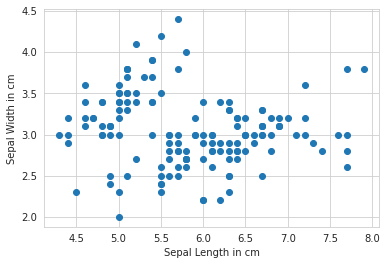

In [ ]:
# Ploting the dataset features(Sepal Length cm and Sepal Width cm)

plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'])
plt.xlabel('Sepal Length in cm')
plt.ylabel('Sepal Width in cm')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


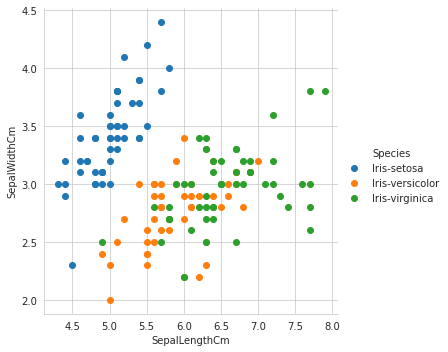

In [ ]:
# Visualizing the SepalLengthCm and SepalWidthCm featues based on target variable.

sns.set_style('whitegrid')
sns.FacetGrid(size = 5,data = df, hue = 'Species').map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()
plt.show();

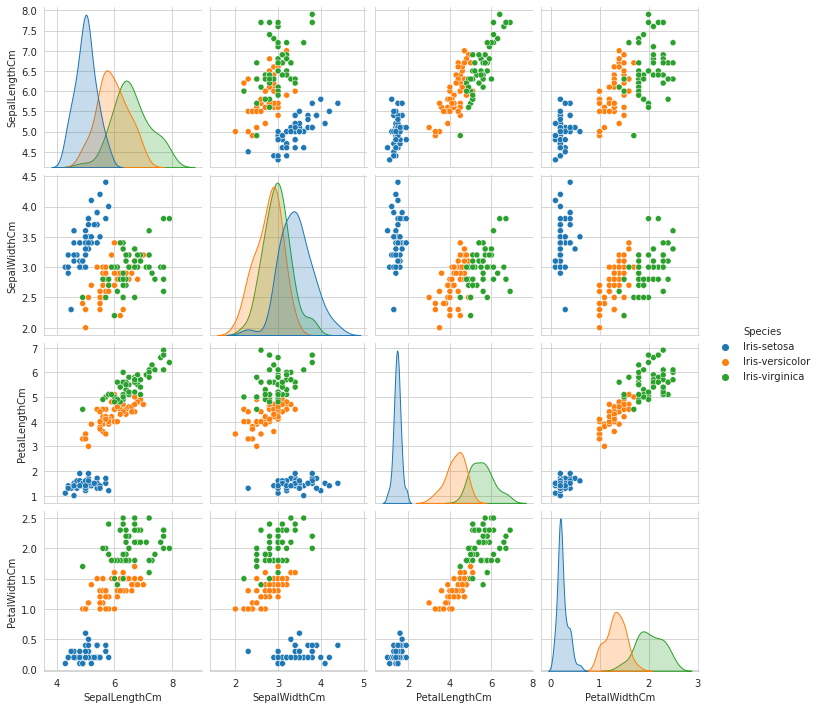

In [ ]:
# Visualizing the relationship between all the features distribution with each other

sns.pairplot(df.drop(['Id'], axis = 1), hue = 'Species')
plt.show()

In [ ]:
# Import necessary libraries for graph viz
import graphviz 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#visualize the Decision Tree

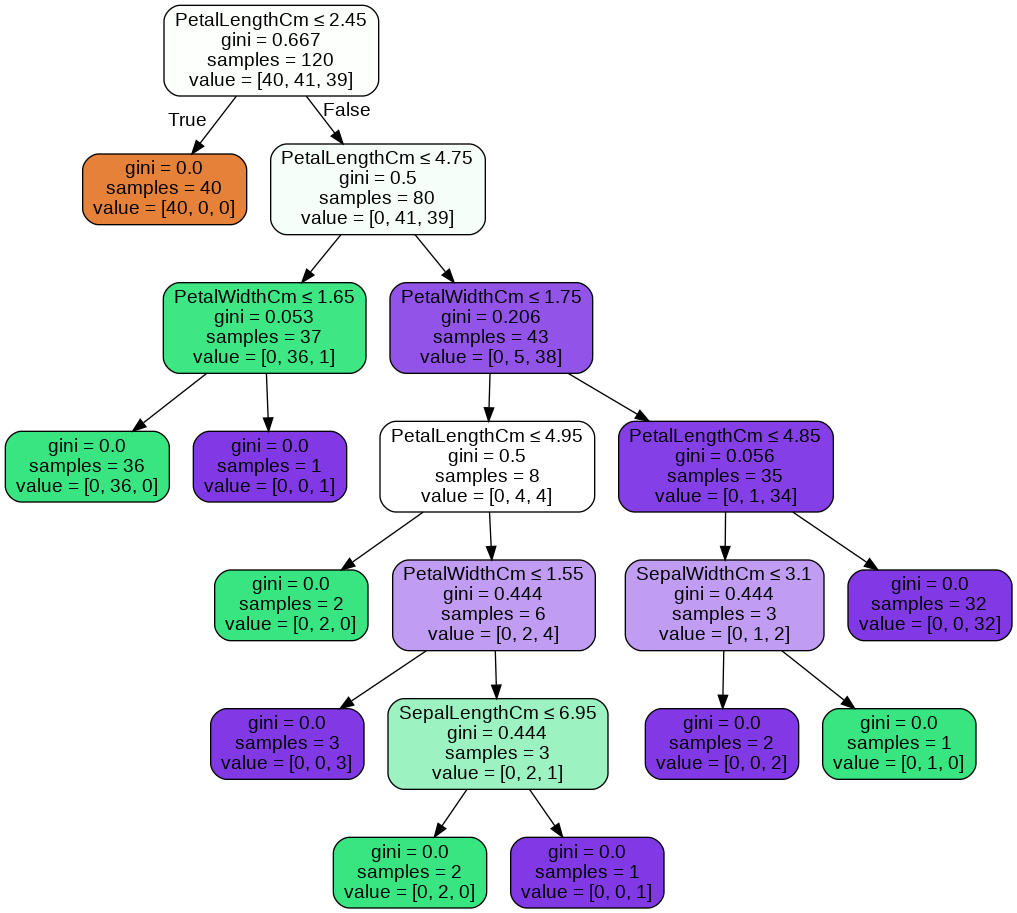

In [ ]:
#In decision tree,we have leaf nodes as output and every non leaf node we are asking the question and take the decision
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

#Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file= dot_data, filled = True,feature_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],  rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())




#Check Accuracy

In [ ]:
#Checking our model performance on actual unseen test data
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

y_preds = dtree.predict(X_test)

print("Model Accuracy Score on totally unseen data (X_test) is: ", accuracy_score(y_test, y_preds) * 100, '%')
print(multilabel_confusion_matrix(y_test, y_preds))

Model Accuracy Score on totally unseen data (X_test) is:  100.0 %
[[[20  0]
  [ 0 10]]

 [[21  0]
  [ 0  9]]

 [[19  0]
  [ 0 11]]]


# Training model on Actual train data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Visualize the graph

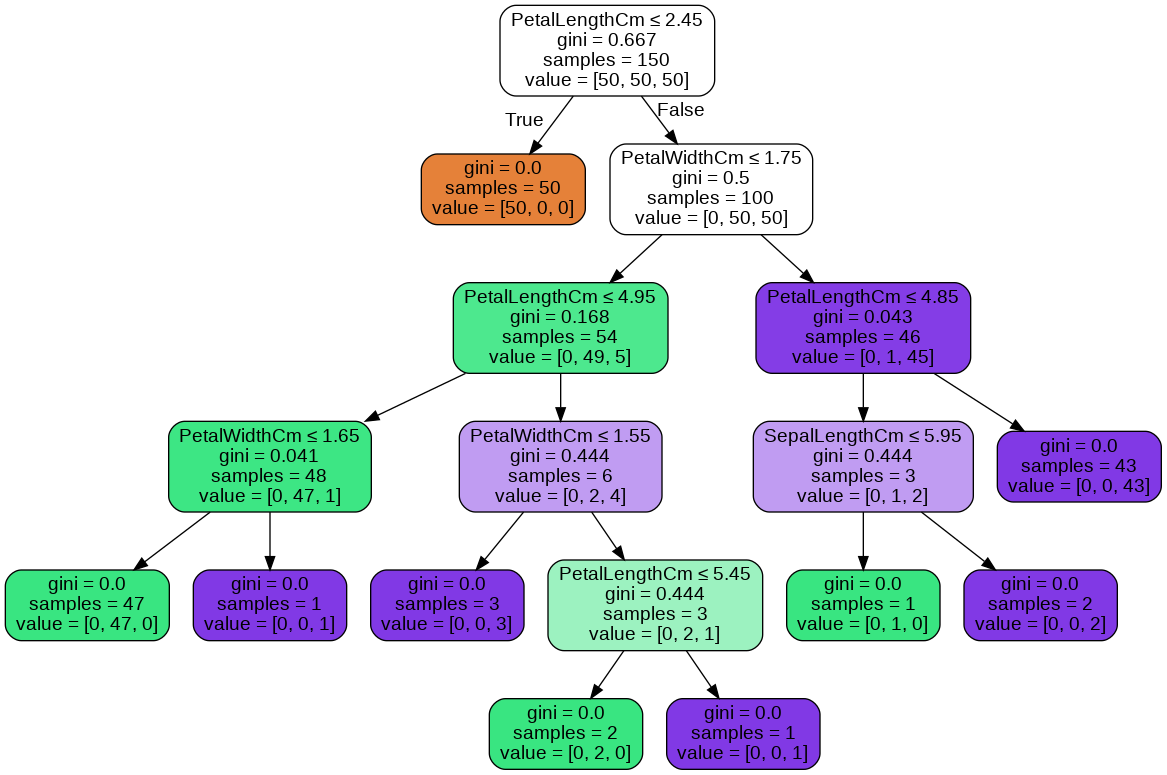

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


#Test prediction by own data

In [ ]:
Test = np.array([5.4, 3.0, 4.5, 1.5]).reshape(1, -1) # features point similar to Iris versicolor
print(dtree.predict(Test))